In [1]:
#Import libraries

import numpy as np
import pandas as pd
from hmmlearn import hmm
import warnings
from constants import *
import matplotlib.pyplot as plt
import collections, operator
warnings.filterwarnings("ignore")

In [2]:
#Dataset

df_main = pd.read_csv('Data/cleaned.txt', sep=",")
print("Dataset size is",len(df_main))
print(df_main.head(5))
X = np.log(df_main.values)

Dataset size is 11087
     cdRPKM0    cdRPKM1    cdRPKM2
0   8.539825   5.879642   5.990043
1  13.837680   4.128452   6.882499
2  39.456786  62.505536  84.519655
3   2.104887   3.488833   2.908098
4  10.010800  17.066902   9.484017


In [3]:
print(X.shape)
print(X[0])

(11087, 3)
[ 2.14474054  1.77149581  1.79009853]


In [4]:
#Fit HMM

remodel = hmm.GaussianHMM(n_components=3,n_iter=100) #consider Gaussian Emissions
remodel.fit(X) #get sequence of states using Viterbi
Z = remodel.predict(X)

In [9]:
print("Hidden states samples")
counts = {}
for idx,i in enumerate(Z):
    if(idx%1000==0):
        print("State of", idx, " is ",i)
    if(i not in counts):
        counts[i]=1
    else:
        counts[i]+=1
print("Counts of each HMM are")
for i in range(0,len(counts)):
    print("HMM",i+1,":",counts[i])

Hidden states samples
State of 0  is  1
State of 1000  is  0
State of 2000  is  0
State of 3000  is  1
State of 4000  is  0
State of 5000  is  1
State of 6000  is  0
State of 7000  is  0
State of 8000  is  2
State of 9000  is  2
State of 10000  is  2
State of 11000  is  2
Counts of each HMM are
HMM 1 : 2770
HMM 2 : 3538
HMM 3 : 4779


In [6]:
print("Transition matrix")
print(remodel.transmat_)
print()

Transition matrix
[[ 0.26390241  0.32994771  0.40614988]
 [ 0.24986951  0.33078873  0.41934177]
 [ 0.24410411  0.31277733  0.44311856]]



In [7]:
print("Means and vars of each hidden state")
for i in range(remodel.n_components):
    print("Hidden state {0}".format(i+1))
    print("mean = ", remodel.means_[i])
    print("var = ", np.diag(remodel.covars_[i]))
    print()

Means and vars of each hidden state
Hidden state 1
mean =  [ 4.10429295  4.22517888  4.15819913]
var =  [ 0.66037745  0.62287659  0.53498223]

Hidden state 2
mean =  [ 0.9989463   1.0069432   1.16122646]
var =  [ 0.76018668  0.71642257  0.71479597]

Hidden state 3
mean =  [ 2.55904467  2.62734274  2.69672201]
var =  [ 0.27312131  0.25214357  0.22370843]



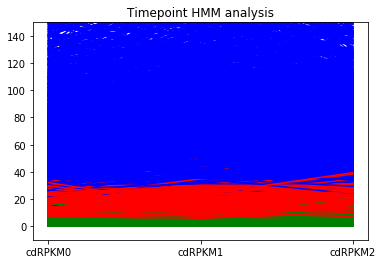

In [8]:
fig = plt.subplot(111)
colors = ['b','g','r','c','m','y','k']
var_plot_list = CDRPKM_LIST
for i in range(len(df_main)):
    fig.plot(var_plot_list, df_main.iloc[i], color = colors[Z[i]])

plt.title("Timepoint HMM analysis")
plt.ylim(-10, 150)
plt.show()

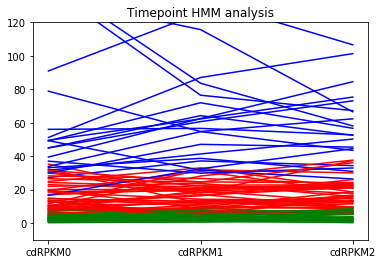

In [10]:
fig = plt.subplot(111)
for i in range(100):
    fig.plot(var_plot_list, df_main.iloc[i], color = colors[Z[i]])
plt.title("Timepoint HMM analysis")
plt.ylim(-10, 120)
plt.show()

In [11]:
fitted_clusters = []
# Append empty clusters
for i in range(0,3):
    fitted_clusters.append([])
    
for idx, i in enumerate(Z):
    fitted_clusters[Z[idx]].append(list(X[idx]))
    
for i in range(0,3):
    dataframe = pd.DataFrame(np.array(fitted_clusters[i]), columns = list("012"))
    print("Descriptive statistics for cluster", i+1, "is")
    print(dataframe.describe())
    print("*************************************************************************")
    print("*************************************************************************")
    print("*************************************************************************")

Descriptive statistics for cluster 1 is
                 0            1            2
count  2770.000000  2770.000000  2770.000000
mean      4.118295     4.240140     4.171263
std       0.801476     0.776148     0.720292
min       0.765615     2.559074     2.429063
25%       3.563952     3.699094     3.662871
50%       3.940421     4.052690     4.025801
75%       4.475322     4.582922     4.517817
max       7.884891     7.954929     7.726945
*************************************************************************
*************************************************************************
*************************************************************************
Descriptive statistics for cluster 2 is
                 0            1            2
count  3538.000000  3538.000000  3538.000000
mean      0.979715     0.984463     1.141413
std       0.862371     0.832136     0.834884
min      -2.600192    -2.616830    -2.599427
25%       0.474790     0.518890     0.705751
50%       1.127885     

In [12]:
#Generate random samples from the model
list(remodel.sample(n_samples=10, random_state=None))

[array([[ 1.13327499,  0.15471754,  1.61016551],
        [ 1.61046324,  0.74253539,  0.50154515],
        [ 0.3897042 ,  1.46010265,  2.10871103],
        [ 2.43980087,  2.11999212,  2.65938809],
        [ 2.62861904,  2.98704134,  2.57375865],
        [ 2.46491447,  2.06338218,  2.65293685],
        [ 0.9668648 , -0.00513729,  1.46813439],
        [ 3.13036349,  2.66549706,  2.00503664],
        [ 1.6153044 ,  2.40356666,  3.24823694],
        [-0.30131516,  2.04444321,  1.83604455]]),
 array([1, 1, 1, 2, 2, 2, 1, 2, 2, 1])]

In [16]:
#Calculate log probability of random sequences and their likelihood of belonging to a state
remodel.score_samples([[ 1.13327499,  0.15471754,  1.61016551]])

(-2.968489656171283,
 array([[  4.15262172e-236,   9.99999998e-001,   2.18478987e-009]]))